# WORKSHOP INTRODUÇÃO À MACHINE LEARNING
Autoria: Lilianne M. I. Nakazono | Organização: Pyladies SP | Local: FIAP Paulista

Neste arquivo vocês irão botar em prática tudo o que aprenderam. Usem o tutorial.ipynb como material de consulta :)

In [2]:
'''


'''

# Importando bibliotecas:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics

In [101]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    print (cm)
    return(cm)
    

In [5]:
'''
3. Leitura de dados
'''
#  Star/Galaxy dataset

url = 'https://raw.githubusercontent.com/marixko/'
file = 'tutorial_classifiers/master/tutorial_data.txt'
data = pd.read_csv(url+file, delim_whitespace=True, low_memory=False)

In [8]:
len(data.columns)

21

In [6]:
data.columns

Index(['FIELD', 'ID', 'RA_1', 'Dec_1', 'FWHM_n', 'A', 'B', 'KrRadDet',
       'uJAVA_auto', 'F378_auto', 'F395_auto', 'F410_auto', 'F430_auto',
       'g_auto', 'F515_auto', 'r_auto', 'F660_auto', 'i_auto', 'F861_auto',
       'z_auto', 'class'],
      dtype='object')

In [7]:
data.iloc[0:20, 20]   # índice 20 é a coluna 21 = Classe do objeto ( estrela/galaxia)

0     GALAXY
1     GALAXY
2     GALAXY
3     GALAXY
4     GALAXY
5     GALAXY
6     GALAXY
7     GALAXY
8     GALAXY
9     GALAXY
10    GALAXY
11    GALAXY
12    GALAXY
13    GALAXY
14    GALAXY
15    GALAXY
16    GALAXY
17    GALAXY
18    GALAXY
19    GALAXY
Name: class, dtype: object

In [16]:
'''
'FWHM_n', 'A', 'B', 'KrRadDet',
       'uJAVA_auto', 'F378_auto', 'F395_auto', 'F410_auto', 'F430_auto',
       'g_auto', 'F515_auto', 'r_auto', 'F660_auto', 'i_auto', 'F861_auto',
       'z_auto',
'''

data2=data.iloc[:,4:22]   #ou [ 4 ; len(data.columns)+1] 
# DEtalhe: nao existe coluna c/ indice 22, mas comando iloc interpreta que queremos até a última coluna


In [17]:
len(data2.columns)

17

In [12]:
data2.iloc[0:20,0]

0     2.64
1     2.19
2     2.13
3     2.33
4     1.96
5     3.41
6     4.75
7     3.04
8     2.33
9     5.02
10    2.39
11    3.85
12    8.06
13    1.84
14    4.07
15    1.51
16    2.67
17    1.49
18    2.20
19    3.53
Name: FWHM_n, dtype: float64

In [18]:
data2.columns

Index(['FWHM_n', 'A', 'B', 'KrRadDet', 'uJAVA_auto', 'F378_auto', 'F395_auto',
       'F410_auto', 'F430_auto', 'g_auto', 'F515_auto', 'r_auto', 'F660_auto',
       'i_auto', 'F861_auto', 'z_auto', 'class'],
      dtype='object')

In [20]:
'''
4.  ANALISE EXPLORATORIA  DE DADOS
'''

data2.corr() 

,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,F395_auto,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto
FWHM_n,1.000000,0.839555,0.512291,0.611989,0.047466,0.074574,0.066278,0.201061,0.175818,0.244246,0.219978,0.286285,0.283785,0.281232,0.260957,0.257709
A,0.839555,1.000000,0.730396,0.542292,-0.145211,-0.120766,-0.131018,-0.003861,-0.043364,-0.001228,-0.032557,0.020555,0.014607,0.007401,-0.018301,-0.022914
B,0.512291,0.730396,1.000000,0.439103,-0.305832,-0.278933,-0.279254,-0.168761,-0.206229,-0.183389,-0.213373,-0.161669,-0.167198,-0.168030,-0.186959,-0.188798
KrRadDet,0.611989,0.542292,0.439103,1.000000,0.250484,0.281638,0.286725,0.459663,0.444757,0.522419,0.491980,0.568063,0.564594,0.563376,0.540045,0.537032
uJAVA_auto,0.047466,-0.145211,-0.305832,0.250484,1.000000,0.977886,0.966915,0.934877,0.931855,0.870678,0.882644,0.750987,0.714843,0.660726,0.620463,0.609367
F378_auto,0.074574,-0.120766,-0.278933,0.281638,0.977886,1.000000,0.971463,0.941335,0.936022,0.876836,0.889432,0.759613,0.724160,0.671152,0.630921,0.619693
F395_auto,0.066278,-0.131018,-0.279254,0.286725,0.966915,0.971463,1.000000,0.945751,0.942531,0.887913,0.898664,0.778982,0.744883,0.694760,0.656544,0.645615
F410_auto,0.201061,-0.003861,-0.168761,0.459663,0.934877,0.941335,0.945751,1.000000,0.984517,0.962703,0.961679,0.884248,0.854985,0.808642,0.768812,0.758427
F430_auto,0.175818,-0.043364,-0.206229,0.444757,0.931855,0.936022,0.942531,0.984517,1.000000,0.973044,0.972831,0.901818,0.874865,0.830889,0.794354,0.784306
g_auto,0.244246,-0.001228,-0.183389,0.522419,0.870678,0.876836,0.887913,0.962703,0.973044,1.000000,0.995132,0.972112,0.955053,0.925839,0.897123,0.890322


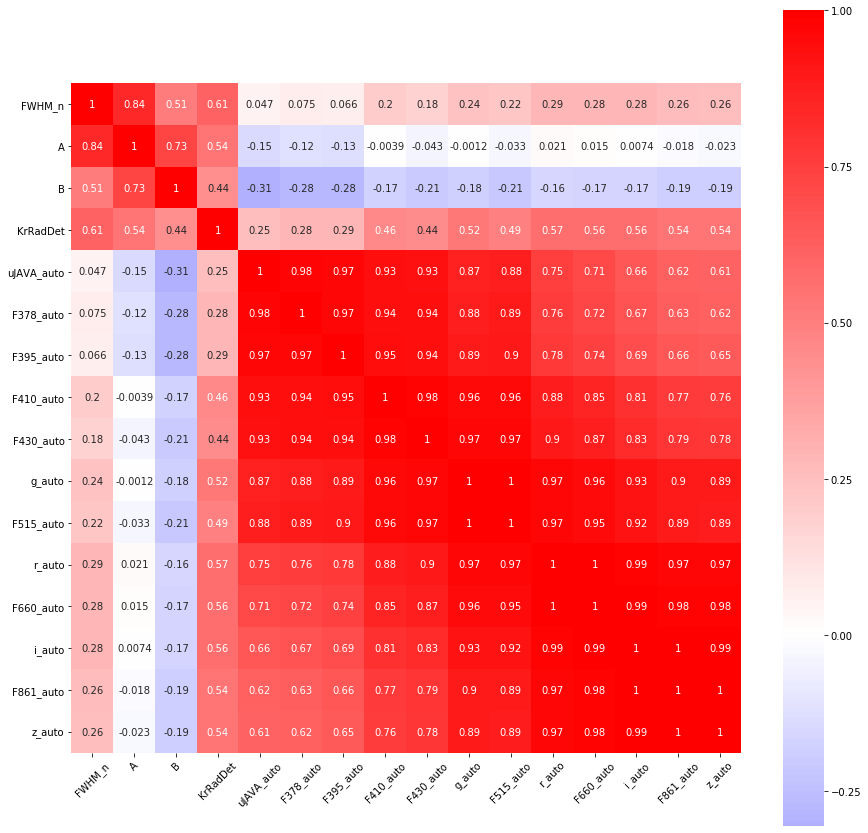

In [26]:
fig,ax=plt.subplots(figsize=(15,15))

chart=sns.heatmap( data2.corr(), cmap='bwr', center=0, square=True, annot=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [38]:
atribut2=data2.iloc[:,0:16] #até a coluna 15  (o 16 nao entra)

class2=data2.iloc[:,16]
#len(class2.columns)  # -----NAO FUNCIONOU
class2   # 'E o y real QUE QUEREMOS estimar '


0       GALAXY
1       GALAXY
2       GALAXY
3       GALAXY
4       GALAXY
         ...  
9995      STAR
9996      STAR
9997      STAR
9998      STAR
9999      STAR
Name: class, Length: 10000, dtype: object

In [39]:
'''
5. Amostragem

Debe-se separar 
Para comparar a performance de diversos modelos (por 
exemplo, com diferentes parâmetros), é importante 
adicionar mais uma etapa: a validação 

'''

#Amostragem para validação cruzada

#target: tem informaçòes das classes
x_train, x_test, y_train, y_test = train_test_split(atribut2, 
                                                    class2,
                                                    test_size=0.3, 
                                                    random_state=2)   ## regra "randomica"

#amostragem aleatorio: no micro tudo é pseu-daleatorio.
#random state é  um numero que sempre as mesmas amostras de teste e treinamento.
#  sempre tera a mesma amostra qd random_state=2


In [42]:
x_train[0:10]

,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,F395_auto,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto
3194,2.57,5.09,3.58,1.55,19.42,18.97,18.98,18.62,18.55,18.27,18.01,17.74,17.52,17.57,17.52,17.46
1507,1.86,2.42,2.08,1.43,20.30,20.05,19.83,19.74,19.63,19.42,19.07,18.98,18.92,18.74,18.68,18.56
3438,3.53,4.90,2.83,1.10,20.21,20.24,19.81,19.98,19.50,18.73,18.58,17.99,17.87,17.59,17.39,17.38
9707,0.93,2.15,1.98,1.17,18.75,18.47,18.27,17.94,17.87,17.61,17.44,17.19,17.14,17.06,17.02,17.02
9689,0.98,2.59,2.54,1.00,19.75,19.49,19.14,18.27,18.00,17.32,17.25,16.42,16.29,16.07,15.97,15.94
9547,1.07,2.38,2.29,1.00,18.37,18.17,17.95,17.24,17.14,16.68,16.51,16.09,16.04,15.86,15.81,15.79
799,5.11,6.92,3.30,1.47,18.97,19.08,18.52,18.51,18.19,17.76,17.57,17.15,17.16,16.91,16.84,16.74
1716,2.63,3.61,2.25,1.65,20.43,20.15,19.99,19.70,19.66,19.37,19.11,18.76,18.70,18.46,18.34,18.30
7894,0.95,2.52,2.17,1.00,19.43,19.36,18.88,18.01,17.63,16.87,16.82,15.90,15.78,15.54,15.44,15.41
5843,1.03,1.91,1.81,1.07,19.50,19.22,19.18,18.52,18.48,18.12,17.80,17.43,17.36,17.21,17.14,17.19


In [156]:
''' 
6. Geração de modelo e VALIDACAO


svm.SVC()
tree.DecisionTreeClassifier()
ensemble.RandomForestClassifier()
neighbours.KNeighborsClassifier()

'''

' \n6. Geração de modelo e VALIDACAO\n\n\nsvm.SVC()\ntree.DecisionTreeClassifier()\nensemble.RandomForestClassifier()\nneighbours.KNeighborsClassifier()\n\n'

In [157]:

'''
MODELO SVC

A separação não precisa ser necessariamente linear 
Para tanto, modifica-se o kernel
'''
clf2 = SVC(kernel='linear')
#clf2.fit(x_train,y_train)
#ou
clf2.fit(x_train,y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [106]:
y_pred_svc=clf2.predict(x_test)

matrix_svc=confusion_matrix(y_test,y_pred_svc)

Confusion matrix, without normalization
[[1498    6]
 [   6 1490]]


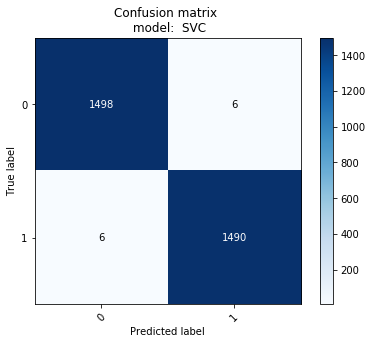

"\nplot_confusion_matrix(cm, classes,\n                          normalize=False,\n                          title='Confusion matrix',\n                          cmap=plt.cm.Blues): \n"

In [159]:
model="  SVC"
#fig,ax=plt.subplots(figsize=(9,9))

fig= plot_confusion_matrix(matrix_svc,classes=['0','1'])
plt.title('Confusion matrix \n model:%s' %model)   #replace original title
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()


'''
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues): 
'''

In [ ]:
'''
Matriz de confusão
                         Predito pelo  modelo
                        Estrela      Galaxia
            Estrela       VP           FN
Verdadeiro  
            Galaxia       FP           VN

      
Métricas de performance

• Acurácia
(VP + VN) / Total
• Precisão (+)
VP / (VP + FP)
• Recall (+)
VP / (VP + FN) 
• F-score
2 (Precision x Recall) / (Precision + Recall)
Como quantificar a performance do seu modelo?  

'''

In [166]:
# https://www.geeksforgeeks.org/multi-dimensional-lists-in-python/
#result_models=[[0 for x in range(5)] for x in range(m)] 

#result_models=[["Model "," VP  ","  FP ", "VN  ","FN  ","Acuracy  ", "Precision   ", "Recall  ","F-score  "]]
result_models=[["Model","Acuracy", "Precision", "Recall","F-score"]]


In [167]:
matrix_model=matrix_svc
cmresult=[model]
VP=matrix_model[0][0]
cmresult.append(VP)

In [168]:

# model="SVC" already created before
cmresult=[model]
VP=matrix_model[0][0]
#cmresult.append(VP)
FP=matrix_model[1][0]
#cmresult.append(FP)
VN=matrix_model[0][1]
#cmresult.append(VN)
FN=matrix_model[1][1]
#cmresult.append(FN)
Acur=(VP+VN)/(VP+VN+FP+FN)
cmresult.append('%.5f' %Acur)
Prec=VP / (VP + FP)
cmresult.append('%.5f' % Prec)
Recall=VP / (VP + FN)
cmresult.append('%.5f' %Recall)
F_score=2* (Prec * Recall) / (Prec + Recall)
cmresult.append('%.5f' %F_score)
result_models.append(cmresult) 
result_models

[['Model', 'Acuracy', 'Precision', 'Recall', 'F-score'],
 ['  SVC', '0.50133', '0.99601', '0.50134', '0.66696']]

In [169]:
for i in range(len(result_models)) :  
    for j in range(len(result_models[i])) :  
        print(result_models[i][j], end=" ") 
    print() 

Model Acuracy Precision Recall F-score 
  SVC 0.50133 0.99601 0.50134 0.66696 


# PART 2 
Testing several models
-------------------------------------------------------

In [178]:

'''
Como MAIS DE 1 MODELO será  TESTADO:
     svm.SVC()
    tree.DecisionTreeClassifier()
    ensemble.RandomForestClassifier()
    neighbours.KNeighborsClassifier()

Então VAMOS REPETIR A ETAPA DE AMOSTRAGEM
p/ VALIDAÇAO CRUZADA

Entao precisamos divir o dataset. 
Cada modelos irá contar com um dataset de teste e validação diferentes.

            DATASET: [estrelas +galaxias/
                            | (amostragem aleatoria)
                            v
        Treinamento               ValidaçÃO
        [estrelas+galaxias]    [estrelas+galaxias]     
            |
            v  (mais uma etapa de amostragem aleatoria: dividir em (i) partes , para i modelos)

Treinamento(i)               ValidaçÃO
[estrelas+galaxias](i)    [estrelas+galaxias] (i)  

Exemplo: 4 modelos
          Dataset "Treinamento" subdividido
          p/ teste ou validação (V)  
          
                      Amostra
            Modelo 1:   (V)   1   2   3
            Modelo 2:    0   (V)  2   3
            Modelo 3:    0    1  (V)  3
            Modelo 4:    0    1   2  (V)

'''
# 1 fase : fazer 1a  divisão do dataset principal
x_train, x_test, y_train, y_test = train_test_split(atribut2, 
                                                    class2,
                                                    test_size=0.3, 
                                                    random_state=2)   ## regra "randomica"

len(x_train)

7000

In [180]:
nmodels=4
nsample=int(len(x_train)/nmodels)
x_sample=nmodels*[0]
y_sample=nmodels*[0]
c=0
for i in range(nmodels):
    x_sample[i]=x_train[c:(c+nsample)]
    y_sample[i]=y_train[c:(c+nsample)]
    c+=nsample
    
len(x_sample[nmodels-1])

1750

In [224]:
print(x_sample[0])  #,x_sample[nmodels-1])

      FWHM_n     A     B  KrRadDet  uJAVA_auto  F378_auto  F395_auto  \
3194    2.57  5.09  3.58      1.55       19.42      18.97      18.98   
1507    1.86  2.42  2.08      1.43       20.30      20.05      19.83   
3438    3.53  4.90  2.83      1.10       20.21      20.24      19.81   
9707    0.93  2.15  1.98      1.17       18.75      18.47      18.27   
9689    0.98  2.59  2.54      1.00       19.75      19.49      19.14   
...      ...   ...   ...       ...         ...        ...        ...   
2725    4.10  5.28  4.26      1.50       19.39      19.32      19.23   
2958    3.39  2.86  2.67      1.44       20.66      20.66      20.63   
8146    1.07  2.68  2.50      1.00       17.75      17.52      17.27   
7937    0.96  2.19  1.98      1.17       18.34      18.04      17.84   
6695    0.99  2.11  2.06      1.00       20.25      20.06      19.62   

      F410_auto  F430_auto  g_auto  F515_auto  r_auto  F660_auto  i_auto  \
3194      18.62      18.55   18.27      18.01   17.74      

In [225]:
print(x_sample[nmodels-1])

      FWHM_n     A     B  KrRadDet  uJAVA_auto  F378_auto  F395_auto  \
8748    1.09  2.60  2.31      1.00       19.01      18.72      18.50   
3354    3.51  4.08  3.08      1.37       19.68      19.17      19.00   
1003    2.58  4.02  3.44      1.44       20.30      20.47      20.37   
6596    1.02  1.88  1.79      1.14       19.81      19.68      19.53   
9745    1.03  1.95  1.80      1.22       20.20      19.92      19.63   
...      ...   ...   ...       ...         ...        ...        ...   
1099    1.65  2.44  2.14      1.40       20.75      20.97      20.48   
2514    2.10  3.62  2.91      1.41       19.88      19.78      19.59   
6637    0.99  2.00  1.94      1.08       20.61      20.61      20.38   
2575    3.77  6.22  3.16      1.43       19.02      18.76      18.68   
7336    1.00  2.63  2.59      1.16       17.96      17.67      17.44   

      F410_auto  F430_auto  g_auto  F515_auto  r_auto  F660_auto  i_auto  \
8748      17.93      17.73   17.16      16.99   16.42      

In [266]:
'''
MODELO 1 - SVC

A separação não precisa ser necessariamente linear 
Para tanto, modifica-se o kernel

'''

frames_x = [x_sample[1], x_sample[2], x_sample[3]]
frames_y = [y_sample[1], y_sample[2], y_sample[3]]
x_train=pd.concat(frames_x)
y_train=pd.concat(frames_y)
len(x_train)
x_test_s=x_sample[0]
y_test_s=y_sample[0]

In [267]:
#clf2.fit(x_train,y_train)
#ou
clf_svc = SVC(kernel='linear')
clf_svc.fit(x_train,y_train.values.ravel())


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [269]:
y_pred_1= clf_svc.predict(x_test_s)

matrix_1=confusion_matrix(y_test_s,y_pred_1)

Confusion matrix, without normalization
[[888   3]
 [  3 856]]


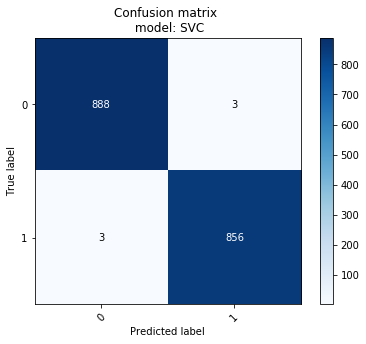

In [270]:
model=" SVC"
#fig,ax=plt.subplots(figsize=(9,9))

fig= plot_confusion_matrix(matrix_1,classes=['0','1'])
plt.title('Confusion matrix \n model:%s' %model)   #replace original title
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [271]:
# Run only for first model
result_models=[["Model","Acuracy", "Precision", "Recall","F-score"]]

In [272]:
# RESULTADOS
matrix_model=matrix_svc
cmresult=[model]
VP=matrix_model[0][0]
cmresult.append(VP)

# model="XXXXX" already created before
cmresult=[model]
VP=matrix_model[0][0]
#cmresult.append(VP)
FP=matrix_model[1][0]
#cmresult.append(FP)
VN=matrix_model[0][1]
#cmresult.append(VN)
FN=matrix_model[1][1]
#cmresult.append(FN)
Acur=(VP+VN)/(VP+VN+FP+FN)
cmresult.append('%.5f' %Acur)
Prec=VP / (VP + FP)
cmresult.append('%.5f' % Prec)
Recall=VP / (VP + FN)
cmresult.append('%.5f' %Recall)
F_score=2* (Prec * Recall) / (Prec + Recall)
cmresult.append('%.5f' %F_score)
result_models.append(cmresult) 
result_models
for i in range(len(result_models)) :  
    for j in range(len(result_models[i])) :  
        print(result_models[i][j], end=" ") 
    print() 

Model Acuracy Precision Recall F-score 
 SVC 0.50914 0.99663 0.50917 0.67400 


In [273]:
'''
MODELO 2 - DEcision Tree Classifier

A separação não precisa ser necessariamente linear 
Para tanto, modifica-se o kernel
'''





frames_x = [x_sample[0], x_sample[2], x_sample[3]]   ####### CHANGE
frames_y = [y_sample[0], y_sample[2], y_sample[3]]    ####### CHANGE
x_train=pd.concat(frames_x)
y_train=pd.concat(frames_y)
len(x_train)
x_test_s=x_sample[1]     ####### CHANGE
y_test_s=y_sample[1]      ####### CHANGE

######## Model structure
clf_dtc = DecisionTreeClassifier()    ####### CHANGE
clf_dtc.fit(x_train,y_train.values.ravel()) ####### CHANGE 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Confusion matrix, without normalization
[[874   9]
 [  7 860]]


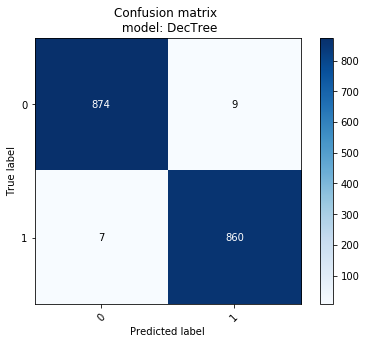

In [274]:
y_pred_2=clf_dtc.predict(x_test_s)   #####change

matrix_2=confusion_matrix(y_test_s,y_pred_2)    ######change

model=" DecTree"     ################change
#fig,ax=plt.subplots(figsize=(9,9))

fig= plot_confusion_matrix(matrix_2,classes=['0','1'])   #########change
plt.title('Confusion matrix \n model:%s' %model)   #replace original title
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()


In [275]:
# RESULTADOS
matrix_model=matrix_2  ############change
cmresult=[model]
VP=matrix_model[0][0]
cmresult.append(VP)

# model="XXXXX" already created before
cmresult=[model]
VP=matrix_model[0][0]
#cmresult.append(VP)
FP=matrix_model[1][0]
#cmresult.append(FP)
VN=matrix_model[0][1]
#cmresult.append(VN)
FN=matrix_model[1][1]
#cmresult.append(FN)
Acur=(VP+VN)/(VP+VN+FP+FN)
cmresult.append('%.5f' %Acur)
Prec=VP / (VP + FP)
cmresult.append('%.5f' % Prec)
Recall=VP / (VP + FN)
cmresult.append('%.5f' %Recall)
F_score=2* (Prec * Recall) / (Prec + Recall)
cmresult.append('%.5f' %F_score)
result_models.append(cmresult) 
result_models
for i in range(len(result_models)) :  
    for j in range(len(result_models[i])) :  
        print(result_models[i][j], end=" ") 
    print() 

Model Acuracy Precision Recall F-score 
 SVC 0.50914 0.99663 0.50917 0.67400 
 DecTree 0.50457 0.99205 0.50404 0.66845 


In [247]:
'''
MODELO 3 - ensemble.RandomForestClassifier()

A separação não precisa ser necessariamente linear 
Para tanto, modifica-se o kernel
'''










frames_x = [x_sample[0], x_sample[1], x_sample[3]]   ####### CHANGE
frames_y = [y_sample[0], y_sample[1], y_sample[3]]    ####### CHANGE
x_train=pd.concat(frames_x)
y_train=pd.concat(frames_y)
len(x_train)
x_test_s=x_sample[2]     ####### CHANGE
y_test_s=y_sample[2]      ####### CHANGE

######## Model structure
clf_rf = RandomForestClassifier()    ####### CHANGE
clf_rf.fit(x_train,y_train.values.ravel()) ####### CHANGE 

c:\users\dalciana\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Confusion matrix, without normalization
[[883   0]
 [  1 866]]


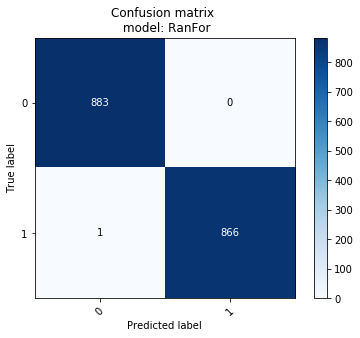

In [276]:
y_pred_3=clf_rf.predict(x_test_s)   #####change

matrix_3=confusion_matrix(y_test_s,y_pred_3)    ######change

model=" RanFor"     ################change
#fig,ax=plt.subplots(figsize=(9,9))

fig= plot_confusion_matrix(matrix_3,classes=['0','1'])   #########change
plt.title('Confusion matrix \n model:%s' %model)   #replace original title
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [277]:
# RESULTADOS
matrix_model=matrix_3  ############change
cmresult=[model]
VP=matrix_model[0][0]
cmresult.append(VP)

# model="XXXXX" already created before
cmresult=[model]
VP=matrix_model[0][0]
#cmresult.append(VP)
FP=matrix_model[1][0]
#cmresult.append(FP)
VN=matrix_model[0][1]
#cmresult.append(VN)
FN=matrix_model[1][1]
#cmresult.append(FN)
Acur=(VP+VN)/(VP+VN+FP+FN)
cmresult.append('%.5f' %Acur)
Prec=VP / (VP + FP)
cmresult.append('%.5f' % Prec)
Recall=VP / (VP + FN)
cmresult.append('%.5f' %Recall)
F_score=2* (Prec * Recall) / (Prec + Recall)
cmresult.append('%.5f' %F_score)
result_models.append(cmresult) 
result_models
for i in range(len(result_models)) :  
    for j in range(len(result_models[i])) :  
        print(result_models[i][j], end=" ") 
    print() 

Model Acuracy Precision Recall F-score 
 SVC 0.50914 0.99663 0.50917 0.67400 
 DecTree 0.50457 0.99205 0.50404 0.66845 
 RanFor 0.50457 0.99887 0.50486 0.67072 


In [252]:

'''
MODELO 4 - neighbours.KNeighborsClassifier()
'''


frames_x = [x_sample[0], x_sample[1], x_sample[2]]   ####### CHANGE
frames_y = [y_sample[0], y_sample[1], y_sample[2]]    ####### CHANGE
x_train=pd.concat(frames_x)
y_train=pd.concat(frames_y)
len(x_train)
x_test_s=x_sample[3]     ####### CHANGE
y_test_s=y_sample[3]      ####### CHANGE

######## Model structure
clf_knc = KNeighborsClassifier()    ####### CHANGE
clf_knc.fit(x_train,y_train.values.ravel()) ####### CHANGE 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Confusion matrix, without normalization
[[882   1]
 [  4 863]]


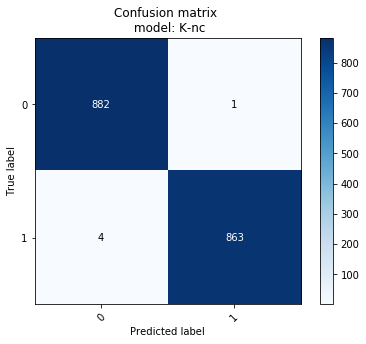

In [278]:
y_pred_4=clf_knc.predict(x_test_s)   #####change

matrix_4=confusion_matrix(y_test_s,y_pred_4)    ######change

model=" K-nc"     ################change
#fig,ax=plt.subplots(figsize=(9,9))

fig= plot_confusion_matrix(matrix_4,classes=['0','1'])   #########change
plt.title('Confusion matrix \n model:%s' %model)   #replace original title
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [279]:
# RESULTADOS
matrix_model=matrix_4  ############change
cmresult=[model]
VP=matrix_model[0][0]
cmresult.append(VP)

# model="XXXXX" already created before
cmresult=[model]
VP=matrix_model[0][0]
#cmresult.append(VP)
FP=matrix_model[1][0]
#cmresult.append(FP)
VN=matrix_model[0][1]
#cmresult.append(VN)
FN=matrix_model[1][1]
#cmresult.append(FN)
Acur=(VP+VN)/(VP+VN+FP+FN)
cmresult.append('%.5f' %Acur)
Prec=VP / (VP + FP)
cmresult.append('%.5f' % Prec)
Recall=VP / (VP + FN)
cmresult.append('%.5f' %Recall)
F_score=2* (Prec * Recall) / (Prec + Recall)
cmresult.append('%.5f' %F_score)
result_models.append(cmresult) 
result_models
for i in range(len(result_models)) :  
    for j in range(len(result_models[i])) :  
        print(result_models[i][j], end=" ") 
    print() 

Model Acuracy Precision Recall F-score 
 SVC 0.50914 0.99663 0.50917 0.67400 
 DecTree 0.50457 0.99205 0.50404 0.66845 
 RanFor 0.50457 0.99887 0.50486 0.67072 
 K-nc 0.50457 0.99549 0.50544 0.67047 


In [263]:
for i in range(len(result_models)) :  
    for j in range(len(result_models[i])) :  
        print(result_models[i][j], end=" ") 
    print() 

Model Acuracy Precision Recall F-score 
  SVC 0.50914 0.99663 0.50917 0.67400 
  DEcTr 0.50457 0.99549 0.50573 0.67072 
  Ranfor 0.50057 0.99206 0.50230 0.66692 
 K-nc 0.48343 0.99764 0.48369 0.65150 


Confusion matrix, without normalization
[[1488   16]
 [  10 1486]]


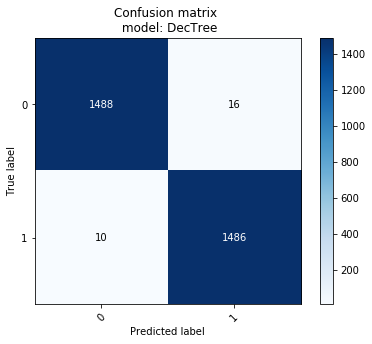

In [280]:
'''
Model chosen :  DEcTree --> model 3

Use original x_test and y_test
'''
model=" DecTree" 
y_pred_final=clf_dtc.predict(x_test)   #####change

matrix_f=confusion_matrix(y_test,y_pred_final)    ######change

    ################change
#fig,ax=plt.subplots(figsize=(9,9))

fig= plot_confusion_matrix(matrix_f,classes=['0','1'])   #########change
plt.title('Confusion matrix \n model:%s' %model)   #replace original title
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()


In [281]:
# RESULTADOS
matrix_model=matrix_f  ############change
cmresult=[model+"_f"]
VP=matrix_model[0][0]
cmresult.append(VP)

# model="XXXXX" already created before
cmresult=[model]
VP=matrix_model[0][0]
#cmresult.append(VP)
FP=matrix_model[1][0]
#cmresult.append(FP)
VN=matrix_model[0][1]
#cmresult.append(VN)
FN=matrix_model[1][1]
#cmresult.append(FN)
Acur=(VP+VN)/(VP+VN+FP+FN)
cmresult.append('%.5f' %Acur)
Prec=VP / (VP + FP)
cmresult.append('%.5f' % Prec)
Recall=VP / (VP + FN)
cmresult.append('%.5f' %Recall)
F_score=2* (Prec * Recall) / (Prec + Recall)
cmresult.append('%.5f' %F_score)
result_models.append(cmresult) 
result_models
for i in range(len(result_models)) :  
    for j in range(len(result_models[i])) :  
        print(result_models[i][j], end=" ") 
    print() 

Model Acuracy Precision Recall F-score 
 SVC 0.50914 0.99663 0.50917 0.67400 
 DecTree 0.50457 0.99205 0.50404 0.66845 
 RanFor 0.50457 0.99887 0.50486 0.67072 
 K-nc 0.50457 0.99549 0.50544 0.67047 
 DecTree 0.50133 0.99332 0.50034 0.66547 


In [282]:
'''
Results

Rod.1 )  30% data for validation
          random=2      
'''
result_models_rod_1=result_models